In [3]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.vgg19 import VGG19

import os
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:


# Specify the path to your Google Drive directory
data_dir = '/content/drive/MyDrive/Split_dataset'

# Check if the specified directory exists
if os.path.exists(data_dir):
    print(f"Connected to Google Drive. Contents of {data_dir}:")

    # List the files and subdirectories in the specified directory
    contents = os.listdir(data_dir)
    for item in contents:
        print(item)
else:
    print(f"Unable to connect to Google Drive. Please check the path: {data_dir}")


Connected to Google Drive. Contents of /content/drive/MyDrive/Split_dataset:
val
test
train
Model
mymodel
fertilizer_recommendations.csv


# New Section

# New Section

In [5]:
vgg=VGG19(input_shape=[224,224]+[3],weights='imagenet',include_top=False)

In [6]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Function to create the VGG-19 model
def create_vgg19_model(input_shape=(224, 224, 3), num_classes=3):
    model = models.Sequential()

    # Block 1
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=input_shape))
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))

    # Block 2
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))

    # Block 3
    model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))

    # Block 4
    model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))

    # Block 5
    model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))

    # Flatten and fully connected layers
    model.add(layers.Flatten())
    model.add(layers.Dense(4096, activation='relu'))
    model.add(layers.Dense(4096, activation='relu'))
    model.add(layers.Dense(num_classes, activation='softmax'))

    return model

# Create VGG-19 model
vgg19_model = create_vgg19_model()

# Display model summary
vgg19_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 64)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 56, 56, 128)       0         
 g2D)                                                   

In [8]:
vgg.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [7]:
for layer in vgg.layers:
  layer.trainable=False

In [8]:
final_arc=Model(inputs=vgg.input,outputs=Dense(3,activation="softmax")(Flatten()(vgg.output)))

In [11]:
final_arc.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [9]:
final_arc.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [13]:


train_augmen = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2,horizontal_flip = True,width_shift_range=0.3)
test_augmen = ImageDataGenerator (rescale =1./255)
valid_augmen=ImageDataGenerator(rescale=1./255)

In [10]:
test_path = '/content/drive/MyDrive/Split_dataset/test'
train_path = '/content/drive/MyDrive/Split_dataset/train'
val_path = '/content/drive/MyDrive/Split_dataset/val'

In [14]:

final_data= train_augmen.flow_from_directory(train_path,target_size=(224,224),class_mode="categorical",batch_size=33)

Found 1721 images belonging to 3 classes.


In [16]:

final_test= test_augmen.flow_from_directory(test_path,target_size=(224,224))

Found 220 images belonging to 3 classes.


In [17]:

final_valid= valid_augmen.flow_from_directory(val_path,target_size=(224,224))

Found 215 images belonging to 3 classes.


In [ ]:

vgg19 = final_arc.fit_generator(final_data, epochs=50, steps_per_epoch=20, validation_data=final_test)


<ipython-input-120-08277a27cea4>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  vgg19 = final_arc.fit_generator(final_data, epochs=50, steps_per_epoch=20, validation_data=final_test)


Epoch 1/50
20/20 [==============================] - 13s 672ms/step - loss: 0.1721 - accuracy: 0.9367 - val_loss: 0.1798 - val_accuracy: 0.9352
Epoch 2/50
20/20 [==============================] - 13s 658ms/step - loss: 0.1802 - accuracy: 0.9288 - val_loss: 0.1545 - val_accuracy: 0.9306
Epoch 3/50
20/20 [==============================] - 12s 592ms/step - loss: 0.1963 - accuracy: 0.9227 - val_loss: 0.1629 - val_accuracy: 0.9398
Epoch 4/50
20/20 [==============================] - 14s 694ms/step - loss: 0.1382 - accuracy: 0.9439 - val_loss: 0.1231 - val_accuracy: 0.9444
Epoch 5/50
20/20 [==============================] - 14s 693ms/step - loss: 0.0904 - accuracy: 0.9652 - val_loss: 0.1372 - val_accuracy: 0.9491
Epoch 6/50
20/20 [==============================] - 13s 658ms/step - loss: 0.0961 - accuracy: 0.9758 - val_loss: 0.1242 - val_accuracy: 0.9583
Epoch 7/50
20/20 [==============================] - 13s 644ms/step - loss: 0.1163 - accuracy: 0.9525 - val_loss: 0.1972 - val_accuracy: 0.9306

In [15]:
final_arc.save('/content/drive/MyDrive/Split_dataset/mymodel/vgg19model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [9]:
import matplotlib. pyplot as plt
plt.plot (vgg19.history['loss'], label= 'train loss')
plt.plot (vgg19.history[ 'val_loss'], label='val loss')
plt.legend()
plt. show()

NameError: ignored

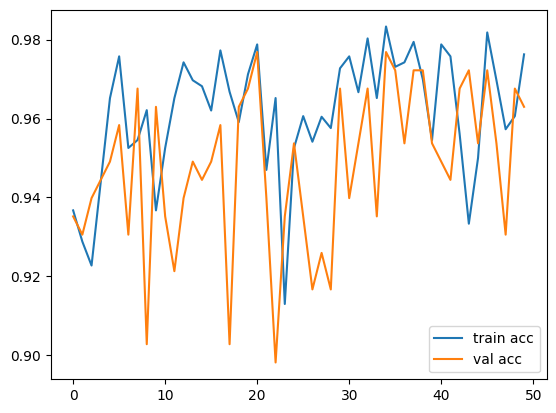

In [ ]:
plt.plot (vgg19.history['accuracy'], label= 'train acc')
plt.plot (vgg19.history['val_accuracy'], label= 'val acc')
plt. legend()
plt.show()

In [16]:
import numpy as пр
from tensorflow.keras.preprocessing import image
image_path = '/content/drive/MyDrive/Split_dataset/test/Potato___healthy/custom2.jpg'

img=image.load_img(image_path,target_size=(224,224))

In [17]:
image_Array=image.img_to_array(img)
image_Array=np.expand_dims(image_Array/225.0,axis=0)
from tensorflow.keras.models import load_model
loaded_model=load_model("/content/drive/MyDrive/Split_dataset/mymodel/vgg19model.h5")

In [18]:
predictions = loaded_model.predict(image_Array)
predicted_class_index = np.argmax(predictions[0])

class_labels = ["Potato___Early_Blight", "Potato___Late_Blight", "Potato___healthy"]
actual_class = os.path.basename(os.path.dirname(image_path))
predicted_class = class_labels[predicted_class_index]


1/1 [==============================] - 1s 1s/step


In [ ]:
# here

# 0- Early blight
# 1- Late Blight
# 2 healthy

In [19]:
print(f"Actual Label: {actual_class}")
print(f"Predicted Label: {predicted_class}")
print(f"Predicted Index: {predicted_class_index}")
print(f"All Predictions: {predictions[0]}")



Actual Label: Potato___healthy
Predicted Label: Potato___healthy
Predicted Index: 2
All Predictions: [0.30942988 0.11836997 0.5722001 ]


In [20]:
loaded_model.predict(image_Array)

1/1 [==============================] - 1s 1s/step


array([[0.30942988, 0.11836997, 0.5722001 ]], dtype=float32)

FileUpload(value={}, description='Upload')

1/1 [==============================] - 1s 798ms/step


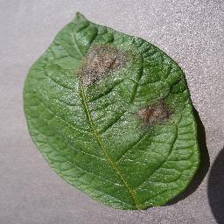

Actual Label: 0acdc2b2-0dde-4073-8542-6fca275ab974___RS_LB 4857.JPG
Predicted Label: Potato___Late_Blight
Confidence: 99.53%
All Predictions: [0.00136387 0.99526125 0.00337494]
1/1 [==============================] - 1s 667ms/step


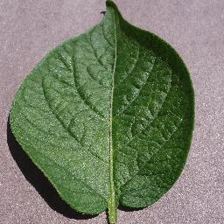

Actual Label: 1f9870b3-899e-46fb-98c9-cfc2ce92895b___RS_HL 1816.JPG
Predicted Label: Potato___healthy
Confidence: 99.92%
All Predictions: [7.3971937e-04 5.1269722e-05 9.9920899e-01]


In [13]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
from IPython.display import display, HTML
import ipywidgets as widgets
from IPython.display import display
from PIL import Image
import io

# Load the pre-trained VGG19 model
loaded_model = load_model("/content/drive/MyDrive/Split_dataset/mymodel/vgg19model.h5")

# Map the predicted index to your class labels
class_labels = ["Potato___Early_Blight", "Potato___Late_Blight", "Potato___healthy"]

# Create an upload button
upload_btn = widgets.FileUpload()


# Create a button click handler function
def on_upload_btn_click(change):
    img = Image.open(io.BytesIO(upload_btn.data[-1]))
    img = img.resize((224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array / 255.0, axis=0)  # Normalize the image

    # Make predictions
    predictions = loaded_model.predict(img_array)

    # Get the predicted class label
    predicted_class_index = np.argmax(predictions[0])
    predicted_class = class_labels[predicted_class_index]

    # Get the actual class label from the filename or metadata
    actual_class = upload_btn.metadata[-1].get("name", "Unknown")

    # Get the confidence level
    confidence = np.max(predictions[0]) * 100

    # Display the image
    display(img)

    # Print the results
    print(f"Actual Label: {actual_class}")
    print(f"Predicted Label: {predicted_class}")
    print(f"Confidence: {confidence:.2f}%")
    print(f"All Predictions: {predictions[0]}")

# Attach the handler function to the button click event
upload_btn.observe(on_upload_btn_click, names='data')

# Display the upload button
display(upload_btn)


FileUpload(value={}, description='Upload')

1/1 [==============================] - 1s 807ms/step


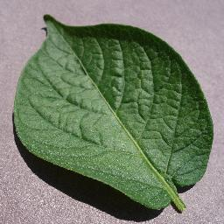

Predicted Disease: Potato___healthy
Recommended Fertilizer: No specific recommendation
All Predictions: [3.2468522e-03 8.1441103e-04 9.9593878e-01]
1/1 [==============================] - 1s 661ms/step


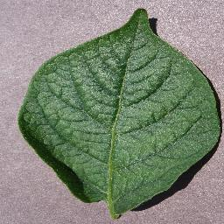

Predicted Disease: Potato___healthy
Recommended Fertilizer: No specific recommendation
All Predictions: [3.6179009e-04 1.2390071e-02 9.8724812e-01]
1/1 [==============================] - 1s 653ms/step


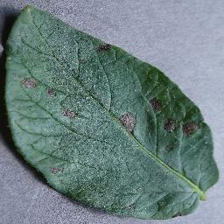

Predicted Disease: Potato___Early_Blight
Recommended Fertilizer: Fertilizer A
All Predictions: [0.9767135  0.02061575 0.00267074]
1/1 [==============================] - 1s 645ms/step


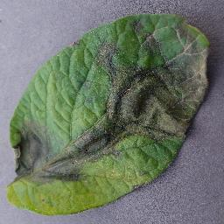

Predicted Disease: Potato___Late_Blight
Recommended Fertilizer: Fertilizer B
All Predictions: [2.6225607e-05 9.9997377e-01 2.2684436e-08]


In [15]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
from IPython.display import display, HTML
import ipywidgets as widgets
from IPython.display import display
from PIL import Image
import io

# Load the pre-trained VGG19 model
vgg19_model = load_model("/content/drive/MyDrive/Split_dataset/mymodel/vgg19model.h5")

# Map the predicted index to your class labels
class_labels = ["Potato___Early_Blight", "Potato___Late_Blight", "Potato___healthy"]

# Mapping between diseases and recommended fertilizers
fertilizer_recommendations = {
    "Potato___Early_Blight": "Fertilizer A",
    "Potato___Late_Blight": "Fertilizer B",
    "Potato___healthy": "No specific recommendation"
}

# Create an upload button
upload_btn = widgets.FileUpload()

# Create a button click handler function
def on_upload_btn_click(change):
    img = Image.open(io.BytesIO(upload_btn.data[-1]))
    img = img.resize((224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array / 255.0, axis=0)  # Normalize the image

    # Make predictions using the pre-trained model
    predictions = vgg19_model.predict(img_array)

    # Get the predicted class label
    predicted_class_index = np.argmax(predictions[0])
    predicted_class = class_labels[predicted_class_index]

    # Get the recommended fertilizer based on the predicted disease
    recommended_fertilizer = fertilizer_recommendations.get(predicted_class, "No specific recommendation")

    # Display the image
    display(img)

    # Print the results
    print(f"Predicted Disease: {predicted_class}")
    print(f"Recommended Fertilizer: {recommended_fertilizer}")
    print(f"All Predictions: {predictions[0]}")

# Attach the handler function to the button click event
upload_btn.observe(on_upload_btn_click, names='data')

# Display the upload button
display(upload_btn)


FileUpload(value={}, description='Upload')

1/1 [==============================] - 1s 810ms/step


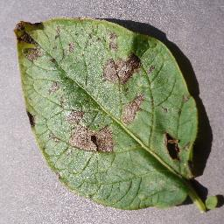

Predicted Disease: Potato___Early_Blight
Recommended Fertilizer: Burn or bag infected plant parts. 
All Predictions: [9.999708e-01 2.923555e-05 9.810802e-09]
1/1 [==============================] - 1s 654ms/step


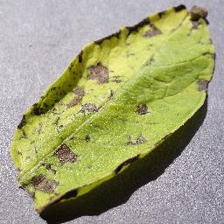

Predicted Disease: Potato___Early_Blight
Recommended Fertilizer: Burn or bag infected plant parts. 
All Predictions: [1.0000000e+00 1.1094134e-09 1.4803022e-15]
1/1 [==============================] - 1s 1s/step


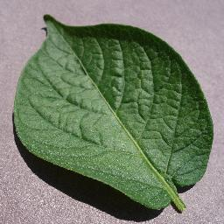

Predicted Disease: Potato___healthy
Recommended Fertilizer: No need fertilizer
All Predictions: [3.2468522e-03 8.1441103e-04 9.9593878e-01]
1/1 [==============================] - 1s 989ms/step


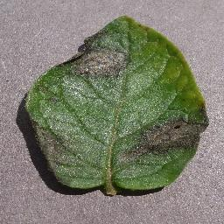

Predicted Disease: Potato___Late_Blight
Recommended Fertilizer: use a tank mixture with the full application rate of fluazinam-containing fungicides.
All Predictions: [3.3995090e-04 9.9965978e-01 2.7415393e-07]


In [18]:
# this is our last code including [upload file, recommend fertilizer, and mapping them ]

import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
from IPython.display import display, HTML
import ipywidgets as widgets
from IPython.display import display
from PIL import Image
import io
import pandas as pd

# Load the pre-trained VGG19 model
vgg19_model = load_model("/content/drive/MyDrive/Split_dataset/mymodel/vgg19model.h5")

# Map the predicted index to your class labels
class_labels = ["Potato___Early_Blight", "Potato___Late_Blight", "Potato___healthy"]

# Load fertilizer recommendations from CSV
df = pd.read_csv("/content/drive/MyDrive/Split_dataset/fertilizer_recommendations.csv")
fertilizer_recommendations = dict(zip(df['disease'], df['recommendation']))

# Create an upload button
upload_btn = widgets.FileUpload()

# Create a button click handler function
def on_upload_btn_click(change):
    img = Image.open(io.BytesIO(upload_btn.data[-1]))
    img = img.resize((224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array / 255.0, axis=0)  # Normalize the image

    # Make predictions using the pre-trained model
    predictions = vgg19_model.predict(img_array)

    # Get the predicted class label
    predicted_class_index = np.argmax(predictions[0])
    predicted_class = class_labels[predicted_class_index]

    # Get the recommended fertilizer based on the predicted disease
    recommended_fertilizer = fertilizer_recommendations.get(predicted_class, "No specific recommendation")

    # Display the image
    display(img)

    # Print the results
    print(f"Predicted Disease: {predicted_class}")
    print(f"Recommended Fertilizer: {recommended_fertilizer}")
    print(f"All Predictions: {predictions[0]}")

# Attach the handler function to the button click event
upload_btn.observe(on_upload_btn_click, names='data')

# Display the upload button
display(upload_btn)


In [ ]:
# starting website or user interface

In [26]:
from tensorflow.keras.models import save_model

# Save the entire model (architecture + weights)
model_path = '/content/drive/MyDrive/Split_dataset/mymodel/final_vgg19.h5'
final_arc.save(model_path)

# Save the model architecture to a JSON file
model_json_path = '/content/drive/MyDrive/Split_dataset/mymodel/final_vgg19.json'
model_json = final_arc.to_json()
with open(model_json_path, 'w') as json_file:
    json_file.write(model_json)

# Save the model weights to an HDF5 file
weights_path = '/content/drive/MyDrive/Split_dataset/mymodel/final_vgg19.h5'
final_arc.save_weights(weights_path)


In [ ]:
!pip install flask tensorflow

from flask import Flask, request, jsonify
from tensorflow.keras.models import load_model
import numpy as np
from tensorflow.keras.preprocessing import image
import io

app = Flask(__name__)

# Load the pre-trained model
model = load_model('/content/drive/MyDrive/Split_dataset/mymodel/vgg19model.h5')

@app.route('/predict', methods=['POST'])
def predict():
    img_data = request.files['image'].read()
    img = image.img_to_array(image.load_img(io.BytesIO(img_data), target_size=(224, 224)))
    img = np.expand_dims(img / 255.0, axis=0)
    predictions = model.predict(img)
    predicted_class = np.argmax(predictions[0])
    class_labels = ["Potato___Early_Blight", "Potato___Late_Blight", "Potato___healthy"]
    result = {"predicted_class": class_labels[predicted_class], "predictions": predictions.tolist()}
    return jsonify(result)

if __name__ == '__main__':
    app.run(host='0.0.0.0', port=5000)


In [ ]:
# Run the Flask app
!pip install flask-ngrok
from flask_ngrok import run_with_ngrok

run_with_ngrok(app)


In [ ]:
!pip install flask-ngrok

from flask import Flask, request, jsonify
from tensorflow.keras.models import load_model
import numpy as np
from tensorflow.keras.preprocessing import image
import io
from flask_ngrok import run_with_ngrok  # If you're using ngrok for Colab

app = Flask(__name__)

# Load the pre-trained VGG19 model
model_path = '/content/drive/MyDrive/Split_dataset/mymodel/vgg19model.h5'
loaded_model = load_model(model_path)

@app.route('/predict', methods=['POST'])
def predict():
    try:
        # Read the binary image data without decoding
        img_data = request.files['image'].read()

        # Decode image using TensorFlow's image module
        img = image.img_to_array(image.load_img(io.BytesIO(img_data), target_size=(224, 224)))

        # Expand dimensions and normalize the image
        img = np.expand_dims(img / 255.0, axis=0)

        # Make predictions
        predictions = loaded_model.predict(img)
        predicted_class = np.argmax(predictions[0])
        class_labels = ["Potato___Early_Blight", "Potato___Late_Blight", "Potato___healthy"]
        result = {"predicted_class": class_labels[predicted_class], "predictions": predictions.tolist()}

        return jsonify(result)

    except Exception as e:
        return jsonify({"error": str(e)})

# Use ngrok to expose Flask app to the internet (for Colab)
run_with_ngrok(app)

if __name__ == '__main__':
    # Run the Flask app
    app.run()



In [21]:
from tensorflow.keras.models import save_model

# Save the entire model (architecture + weights)
model_path = '/content/drive/MyDrive/Split_dataset/mymodel/final_arc_model.h5'
final_arc.save(model_path)

# Save the model architecture to a JSON file
model_json_path = '/content/drive/MyDrive/Split_dataset/mymodel/final_arc_model.json'
model_json = final_arc.to_json()
with open(model_json_path, 'w') as json_file:
    json_file.write(model_json)

# Save the model weights to an HDF5 file
weights_path = '/content/drive/MyDrive/Split_dataset/mymodel/final_arc_weights.h5'
final_arc.save_weights(weights_path)


In [22]:
!pip install flask tensorflow

from flask import Flask, request, jsonify
from tensorflow.keras.models import load_model
import numpy as np
from tensorflow.keras.preprocessing import image
import io

app = Flask(__name__)

# Load the pre-trained model
model = load_model('/content/drive/MyDrive/Split_dataset/mymodel/final_arc_weights.h5')

@app.route('/predict', methods=['POST'])
def predict():
    img_data = request.files['image'].read()
    img = image.img_to_array(image.load_img(io.BytesIO(img_data), target_size=(224, 224)))
    img = np.expand_dims(img / 255.0, axis=0)
    predictions = model.predict(img)
    predicted_class = np.argmax(predictions[0])
    class_labels = ["Potato___Early_Blight", "Potato___Late_Blight", "Potato___healthy"]
    result = {"predicted_class": class_labels[predicted_class], "predictions": predictions.tolist()}
    return jsonify(result)

if __name__ == '__main__':
    app.run(host='0.0.0.0', port=5000)


ValueError: ignored

In [ ]:
from flask import Flask, request, jsonify
from tensorflow.keras.models import model_from_json
import numpy as np
from tensorflow.keras.preprocessing import image
import io

app = Flask(__name__)

# Load the model architecture from JSON
model_json_path = '/content/drive/MyDrive/Split_dataset/mymodel/final_arc_model.json'
with open(model_json_path, 'r') as json_file:
    model_json = json_file.read()
    loaded_model = model_from_json(model_json)

# Load the model weights
weights_path = '/content/drive/MyDrive/Split_dataset/mymodel/final_arc_weights.h5'
loaded_model.load_weights(weights_path)

@app.route('/predict', methods=['POST'])
def predict():
    try:
        # Read the binary image data without decoding
        img_data = request.files['image'].read()

        # Decode image using TensorFlow's image module
        img = image.img_to_array(image.load_img(io.BytesIO(img_data), target_size=(224, 224)))

        # Expand dimensions and normalize the image
        img = np.expand_dims(img / 255.0, axis=0)

        # Make predictions
        predictions = loaded_model.predict(img)
        predicted_class = np.argmax(predictions[0])
        class_labels = ["Potato___Early_Blight", "Potato___Late_Blight", "Potato___healthy"]
        result = {"predicted_class": class_labels[predicted_class], "predictions": predictions.tolist()}

        return jsonify(result)

    except Exception as e:
        return jsonify({"error": str(e)})

if __name__ == '__main__':
    app.run(host='0.0.0.0', port=5000)


 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:5000
 * Running on http://172.28.0.12:5000
INFO:werkzeug:Press CTRL+C to quit
